In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer


In [6]:
from google.colab import files
uploaded = files.upload()
df = pd.read_csv("zomato_reviews.csv")

Saving zomato_reviews.csv to zomato_reviews (2).csv


In [7]:
df.head(5)

,Unnamed: 0,rating,review
0,0,5,nice
1,1,5,"best biryani , so supportive staff of outlet ,..."
2,2,4,delivery boy was very decent and supportive.👌👍
3,3,1,"worst biryani i have tasted in my life, half o..."
4,4,5,all food is good and tasty . will order again ...


In [8]:
df.shape

(5479, 3)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5479 entries, 0 to 5478
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5479 non-null   int64 
 1   rating      5479 non-null   int64 
 2   review      5478 non-null   object
dtypes: int64(2), object(1)
memory usage: 128.5+ KB


In [10]:
df.describe()

,Unnamed: 0,rating
count,5479.000000,5479.000000
mean,2739.000000,3.161343
std,1581.795393,1.782197
min,0.000000,1.000000
25%,1369.500000,1.000000
50%,2739.000000,4.000000
75%,4108.500000,5.000000
max,5478.000000,5.000000


In [11]:
df.isnull().sum()

,0
Unnamed: 0,0
rating,0
review,1


In [19]:
df.dropna(subset=['review'], inplace=True)

In [20]:
df.isnull().sum()

,0
Unnamed: 0,0
rating,0
review,0
categorize_sentiment_rating,0


In [12]:
def categorize_rating(rating):
    if rating >= 4:
        return "Positive"
    elif rating == 3:
        return "Neutral"
    else:
        return "Negative"

df['categorize_sentiment_rating'] = df['rating'].apply(categorize_rating)

In [13]:
df['categorize_sentiment_rating'].value_counts()

,count
categorize_sentiment_rating,
Positive,2746
Negative,2259
Neutral,474


In [14]:
df.head(10)

,Unnamed: 0,rating,review,categorize_sentiment_rating
0,0,5,nice,Positive
1,1,5,"best biryani , so supportive staff of outlet ,...",Positive
2,2,4,delivery boy was very decent and supportive.👌👍,Positive
3,3,1,"worst biryani i have tasted in my life, half o...",Negative
4,4,5,all food is good and tasty . will order again ...,Positive
5,5,5,shandar zabardast zindabad .. good going bawar...,Positive
6,6,5,overall good experience . will order again,Positive
7,7,1,good but cold of food,Negative
8,8,5,tasty food . homestyle tasty prepration.,Positive
9,9,5,loved it . 5/5 .,Positive


In [24]:
def apply_stemming(text):
    stemmer = PorterStemmer()
    tokens = word_tokenize(text.lower())
    stemmed = [stemmer.stem(word) for word in tokens]
    return " ".join(stemmed)

# Lemmatization function
def apply_lemmatization(text):
    lemmatizer = WordNetLemmatizer()
    tokens = word_tokenize(text.lower())
    lemmatized = [lemmatizer.lemmatize(word) for word in tokens]
    return " ".join(lemmatized)

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=1000)  # Limit features for simplicity
X = vectorizer.fit_transform(df['review']).toarray()

In [28]:
import nltk
try:
    nltk.data.find('sentiment/vader_lexicon.zip')
except LookupError:
    nltk.download('vader_lexicon')

from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
df['sentiment_score'] = df['review'].apply(lambda x: sia.polarity_scores(x)['compound'])

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [39]:
df.head(20)

,Unnamed: 0,rating,review,categorize_sentiment_rating,sentiment_score
0,0,5,nice,Positive,0.4215
1,1,5,"best biryani , so supportive staff of outlet ,...",Positive,0.7713
2,2,4,delivery boy was very decent and supportive.👌👍,Positive,0.0000
3,3,1,"worst biryani i have tasted in my life, half o...",Negative,-0.6249
4,4,5,all food is good and tasty . will order again ...,Positive,0.4404
5,5,5,shandar zabardast zindabad .. good going bawar...,Positive,0.4404
6,6,5,overall good experience . will order again,Positive,0.4404
7,7,1,good but cold of food,Negative,0.2382
8,8,5,tasty food . homestyle tasty prepration.,Positive,0.0000
9,9,5,loved it . 5/5 .,Positive,0.5994



Sentiment Categories based on VADER score:
predicted_sentiment
Neutral     3546
Positive    1092
Negative     840
Name: count, dtype: int64


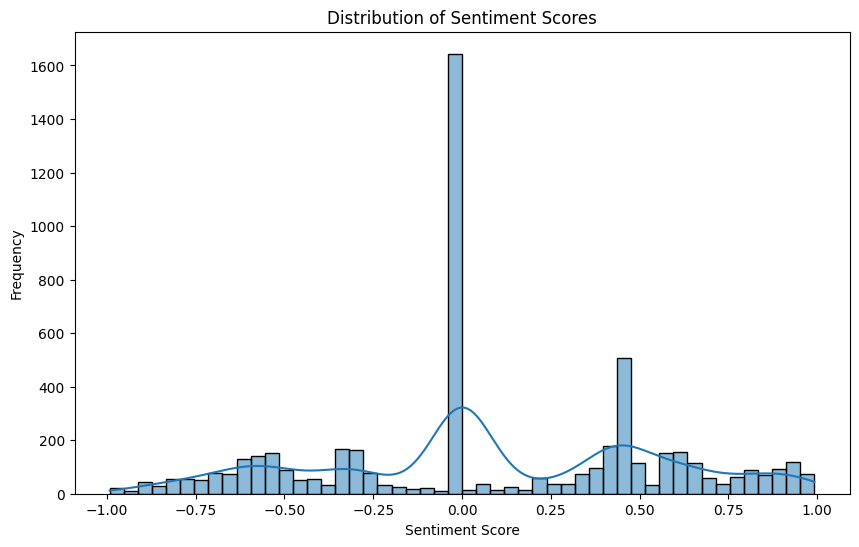

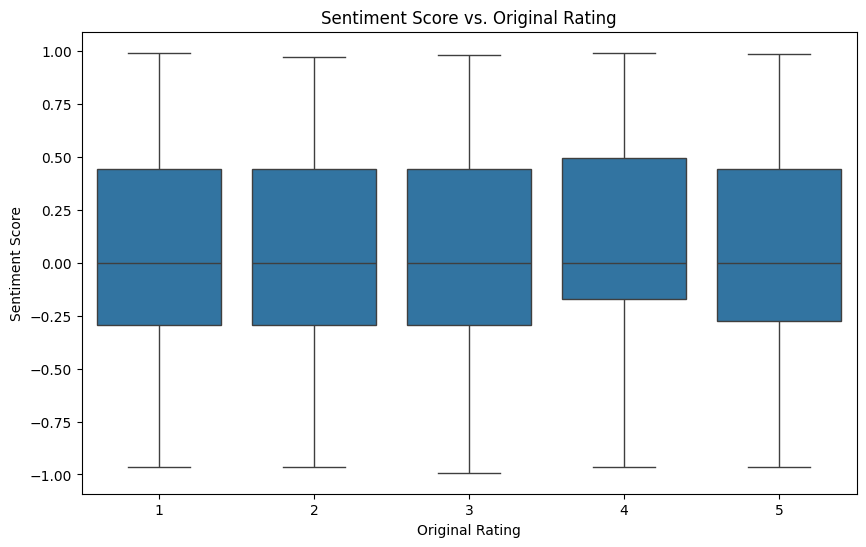


Examples of Highly Positive Reviews (sentiment_score > 0.9):
                                                review  sentiment_score
26   Awesome experience guys...these people really ...           0.9336
109  Good taste Good service Thanks for accepting f...           0.9274
154  Thanks. great food. love that you are take in ...           0.9392
210  I don’t usually write reviews but I was compel...           0.9693
401  First of all the restaurant look is verry beau...           0.9545

Examples of Highly Negative Reviews (sentiment_score < -0.9):
                                                 review  sentiment_score
262   Taste like hell. Too bad Very Bad Not Good Qua...          -0.9195
729   This time food is very bad ni tesh also chicke...          -0.9256
835   The item i recieved was not Laziz Handi ...i d...          -0.9057
885   I have ordered paneer cheese paratha and there...          -0.9209
1139  cold coco is not in container but all in plast...          -0.9081


In [40]:
# 2. Categorizing Sentiment based on Score (using VADER's suggested thresholds)
def predicted_sentiment_score(score):
    if score >= 0.5:
        return "Positive"
    elif score <= -0.5:
        return "Negative"
    else:
        return "Neutral"

df['predicted_sentiment'] = df['sentiment_score'].apply(predicted_sentiment_score)

print("\nSentiment Categories based on VADER score:")
print(df['predicted_sentiment'].value_counts())

# 3. Analyzing Distribution (using a histogram)
plt.figure(figsize=(10, 6))
sns.histplot(df['sentiment_score'], bins=50, kde=True)
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

# 4. Relating to other data (e.g., compare sentiment score with original rating)
plt.figure(figsize=(10, 6))
sns.boxplot(x='rating', y='sentiment_score', data=df)
plt.title('Sentiment Score vs. Original Rating')
plt.xlabel('Original Rating')
plt.ylabel('Sentiment Score')
plt.show()

# 5. Identifying Extremes (displaying highly positive and negative reviews)
print("\nExamples of Highly Positive Reviews (sentiment_score > 0.9):")
print(df[df['sentiment_score'] > 0.9][['review', 'sentiment_score']].head())

print("\nExamples of Highly Negative Reviews (sentiment_score < -0.9):")
print(df[df['sentiment_score'] < -0.9][['review', 'sentiment_score']].head())

In [41]:
df.head(10)

,Unnamed: 0,rating,review,categorize_sentiment_rating,sentiment_score,predicted_sentiment
0,0,5,nice,Positive,0.4215,Neutral
1,1,5,"best biryani , so supportive staff of outlet ,...",Positive,0.7713,Positive
2,2,4,delivery boy was very decent and supportive.👌👍,Positive,0.0000,Neutral
3,3,1,"worst biryani i have tasted in my life, half o...",Negative,-0.6249,Negative
4,4,5,all food is good and tasty . will order again ...,Positive,0.4404,Neutral
5,5,5,shandar zabardast zindabad .. good going bawar...,Positive,0.4404,Neutral
6,6,5,overall good experience . will order again,Positive,0.4404,Neutral
7,7,1,good but cold of food,Negative,0.2382,Neutral
8,8,5,tasty food . homestyle tasty prepration.,Positive,0.0000,Neutral
9,9,5,loved it . 5/5 .,Positive,0.5994,Positive


In [42]:
baseline_accuracy = df['predicted_sentiment'].value_counts().max() / len(df)
print(f"Baseline Accuracy: {baseline_accuracy:.2f}")

Baseline Accuracy: 0.65


USING CROSS VALIDATION FOR ACCURACY

In [43]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['review'])
y = df['predicted_sentiment']

In [44]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()

In [47]:
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')

In [48]:
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean()}")

Cross-Validation Scores: [0.82782212 0.85404789 0.85159817 0.84703196 0.85388128]
Mean CV Accuracy: 0.8468762853855246


In [66]:
cv_precision_scores = cross_val_score(model, X, y, cv=5, scoring='precision_weighted')
cv_recall_scores = cross_val_score(model, X, y, cv=5, scoring='recall_weighted')

print(f"Cross-Validation Precision Scores (weighted): {cv_precision_scores}")
print(f"Mean CV Precision (weighted): {cv_precision_scores.mean()}")


Cross-Validation Precision Scores (weighted): [0.81218025 0.82843454 0.81387048 0.85406266 0.81639739]
Mean CV Precision (weighted): 0.8249890628528952


In [67]:
cv_precision_scores_macro = cross_val_score(model, X, y, cv=5, scoring='precision_macro')
print(f"Cross-Validation Precision Scores (macro): {cv_precision_scores_macro}")
print(f"Mean CV Precision (macro): {cv_precision_scores_macro.mean()}")

# Calculate cross-validation scores for recall (macro average)
cv_recall_scores_macro = cross_val_score(model, X, y, cv=5, scoring='recall_macro')
print(f"\nCross-Validation Recall Scores (macro): {cv_recall_scores_macro}")
print(f"Mean CV Recall (macro): {cv_recall_scores_macro.mean()}")

Cross-Validation Precision Scores (macro): [0.79744753 0.8077644  0.78312104 0.81265559 0.75095889]
Mean CV Precision (macro): 0.7903894899233086

Cross-Validation Recall Scores (macro): [0.72087382 0.75788897 0.75377803 0.82619154 0.79856725]
Mean CV Recall (macro): 0.7714599224655334


In [49]:
model.fit(X_train, y_train)

MultinomialNB()

In [50]:
y_pred = model.predict(X_test)

In [51]:
# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy}")

Test Accuracy: 0.8321167883211679


In [52]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(
    model, X_train, y_train, cv=5, scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1)

In [53]:
train_mean = train_scores.mean(axis=1)
train_std = train_scores.std(axis=1)
test_mean = test_scores.mean(axis=1)
test_std = test_scores.std(axis=1)


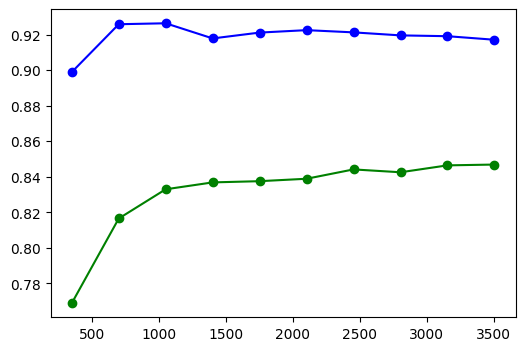

In [56]:
# Plot the learning curve
plt.figure(figsize=(6, 4))
plt.plot(train_sizes, train_mean, label='Training Accuracy', color='blue', marker='o')
plt.plot(train_sizes, test_mean, label='Validation Accuracy', color='green', marker='o')

<ipython-input-55-113c6ec3774b>:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='best')


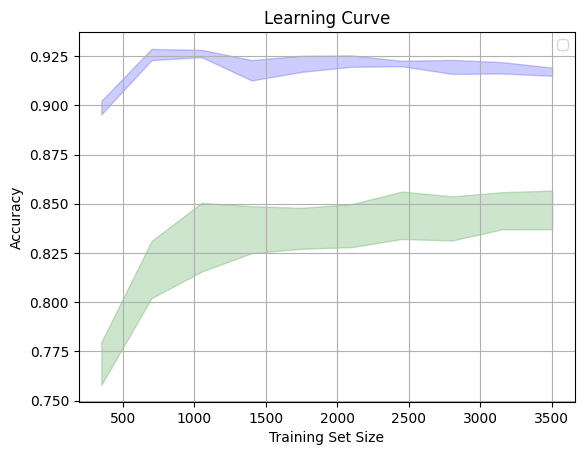

In [55]:
# Plot the standard deviation as a shaded area
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.2)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='green', alpha=0.2)
plt.title('Learning Curve')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [57]:
negative_reviews = df[df['categorize_sentiment_rating'] == 'Negative']
neutral_reviews = df[df['categorize_sentiment_rating'] == 'Neutral']
positive_reviews = df[df['categorize_sentiment_rating'] == 'Positive']

# Example: If you want to analyze or improve 'Negative' sentiment reviews
print("Number of Negative Reviews:", negative_reviews.shape[0])
print("Negative Reviews Sample:")
print(negative_reviews.head())  # Display the first few negative reviews



# For targeted improvements, you can apply further filtering, like those with low ratings or specific keywords:
# For example, negative reviews with ratings less than 3 (if 'rating' is another column you have):
targeted_improvements = df[(df['categorize_sentiment_rating'] == 'Negative') & (df['rating'] <= 3)]

print("Targeted Improvement Reviews:")
print(targeted_improvements.head())

Number of Negative Reviews: 2259
Negative Reviews Sample:
    Unnamed: 0  rating                                             review  \
3            3       1  worst biryani i have tasted in my life, half o...   
7            7       1                              good but cold of food   
16          16       1  i have ordered Manchurian fried rice but inste...   
17          17       1                       very bad not properly cooked   
21          21       1     Taste less nd took 55 min to deliver the order   

   categorize_sentiment_rating  sentiment_score predicted_sentiment  
3                     Negative          -0.6249            Negative  
7                     Negative           0.2382             Neutral  
16                    Negative          -0.1154             Neutral  
17                    Negative          -0.5849            Negative  
21                    Negative           0.0000             Neutral  
Targeted Improvement Reviews:
    Unnamed: 0  rating       

In [58]:
poor_reviews = df[df['review'].str.contains('poor', case=False)] #case:direct condition flase
print("Poor Reviews Sample:")
print(poor_reviews.head())

Poor Reviews Sample:
     Unnamed: 0  rating                                             review  \
220         220       5                                       Poor quality   
419         419       5  paner only 4 money vest karna hai paneer ni de...   
430         430       1  poor test not proper packing no fresh selad it...   
493         493       4                                quality very poor.    
554         554       1  pathetic,  sry to say but very poor quality fo...   

    categorize_sentiment_rating  sentiment_score predicted_sentiment  
220                    Positive          -0.4767             Neutral  
419                    Positive          -0.4767             Neutral  
430                    Negative          -0.8914            Negative  
493                    Positive          -0.5256            Negative  
554                    Negative          -0.7869            Negative  


In [60]:
# Define states based on your data distribution
def get_state(sentiment_score):
    """Convert sentiment score to discrete state based on your data distribution"""
    if sentiment_score <= -0.5:
        return 'very_negative'
    elif sentiment_score <= -0.2:
        return 'negative'
    elif sentiment_score <= 0.2:
        return 'neutral'
    elif sentiment_score <= 0.5:
        return 'positive'
    else:
        return 'very_positive'

# Define categories and possible actions
Rating_categories = df['rating'].unique()
states = ['very_negative', 'negative', 'neutral', 'positive', 'very_positive']
actions = ['improve', 'maintain', 'moderate']




In [61]:
# Initialize Q-table for each category
q_tables = {category: np.zeros((len(states), len(actions))) for category in Rating_categories}

#Q-tabel is a 2D Numpy array of Zero
def calculate_reward(old_score, new_score, target_score=0.6):
    """
    Calculate reward based on movement towards target score
    Target score is set to 0.6 as a positive sentiment threshold
    """
    old_distance = abs(target_score - old_score)
    new_distance = abs(target_score - new_score)

    if new_distance < old_distance:
        return 1
    elif new_distance == old_distance:
        return 0
    else:
        return -1

def take_action(score, action):
    """Modify the sentiment score based on the chosen action"""
    if action == 'imaaprove':
        return min(1.0, score + np.random.uniform(0.1, 0.3))  #increases the sentiment score by adding a random value between 0.1 and 0.3
    elif action == 'maintain':
        return score + np.random.uniform(-0.1, 0.1)
    else:  # moderate
        return max(-1.0, score - np.random.uniform(0.1, 0.3))  #decreases the sentiment score by subtracting a random value between 0.1 and 0.3

In [62]:
sentiment_values=df.sentiment_score
print(sentiment_values)

0       0.4215
1       0.7713
2       0.0000
3      -0.6249
4       0.4404
         ...  
5474   -0.3612
5475   -0.3343
5476    0.2263
5477    0.0000
5478    0.5831
Name: sentiment_score, Length: 5478, dtype: float64


In [64]:
episodes = 1000
learning_rate = 0.1
discount_factor = 0.9
epsilon = 0.2

for category in Rating_categories:
    print(f"\nTraining for rating: {category}")
    category_data = df[df['rating'] == category]

    for episode in range(episodes):
        # Randomly select a review from the category
        sample = category_data.sample(n=1).iloc[0]
        current_score = sample['sentiment_score']
        current_state = get_state(current_score)

        # Epsilon-greedy action selection
        if np.random.random() < epsilon:
            action = np.random.choice(actions)
        else:
            state_index = states.index(current_state)
            action_index = np.argmax(q_tables[category][state_index])
            action = actions[action_index]

        # Take action and get new state
        new_score = take_action(current_score, action)
        new_state = get_state(new_score)
        reward = calculate_reward(current_score, new_score)

        # Update Q-table
        state_index = states.index(current_state)
        action_index = actions.index(action)
        next_state_index = states.index(new_state)

        q_tables[category][state_index, action_index] += learning_rate * (
            reward + discount_factor * np.max(q_tables[category][next_state_index])
            - q_tables[category][state_index, action_index]
        )

        # Print progress
        if (episode + 1) % 200 == 0:
            print(f"Episode {episode + 1}")
            print(f"Current score: {current_score:.4f} -> New score: {new_score:.4f}")
            print(f"Current state: {current_state} -> New state: {new_state}")
            print(f"Reward: {reward}")
            print("---")

# Print final Q-tables
for category in Rating_categories:
    print(f"\nTrained Q-Table for Rating_category: {category}")
    print("States (rows):", states)
    print("Actions (columns):", actions)
    print(q_tables[category])

# Function to get recommended action for a new review
def get_recommendation(rating_category, sentiment_score):
    state = get_state(sentiment_score)
    state_index = states.index(state)
    action_index = np.argmax(q_tables[rating_category][state_index])
    return actions[action_index]

# Example of using the trained model
print("\nExample Recommendations:")
for index, row in df.sample(3).iterrows():
    recommended_action = get_recommendation(row['rating'], row['sentiment_score'])
    print(f"Rating Category: {row['rating']}")
    print(f"Current Sentiment Score: {row['sentiment_score']:.4f}")
    print(f"Recommended Action: {recommended_action}")
    print("---")




Training for rating: 5
Episode 200
Current score: -0.7063 -> New score: -0.6906
Current state: very_negative -> New state: very_negative
Reward: 1
---
Episode 400
Current score: 0.0000 -> New score: 0.0924
Current state: neutral -> New state: neutral
Reward: 1
---
Episode 600
Current score: -0.4767 -> New score: -0.6271
Current state: negative -> New state: very_negative
Reward: -1
---
Episode 800
Current score: 0.7003 -> New score: 0.6101
Current state: very_positive -> New state: very_positive
Reward: 1
---
Episode 1000
Current score: 0.0000 -> New score: -0.0049
Current state: neutral -> New state: neutral
Reward: -1
---

Training for rating: 4
Episode 200
Current score: 0.6369 -> New score: 0.3830
Current state: very_positive -> New state: positive
Reward: -1
---
Episode 400
Current score: 0.7506 -> New score: 0.5371
Current state: very_positive -> New state: very_positive
Reward: 1
---
Episode 600
Current score: -0.8074 -> New score: -0.8369
Current state: very_negative -> New st

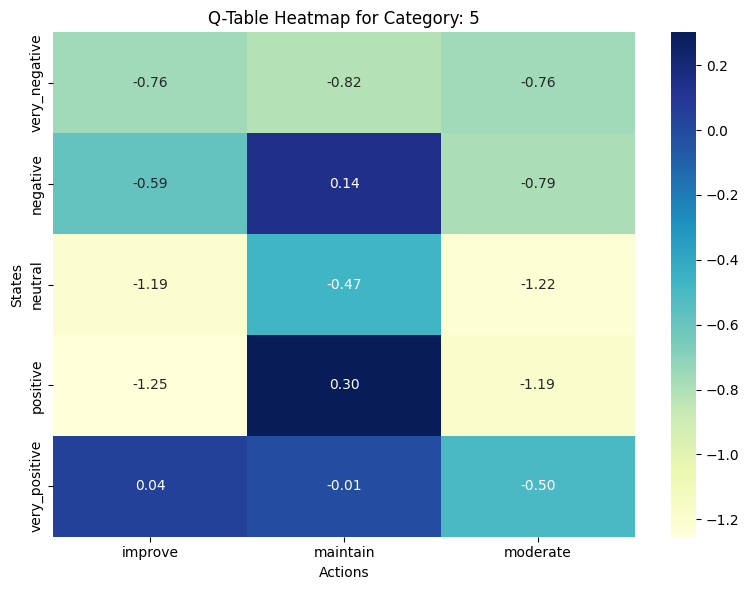

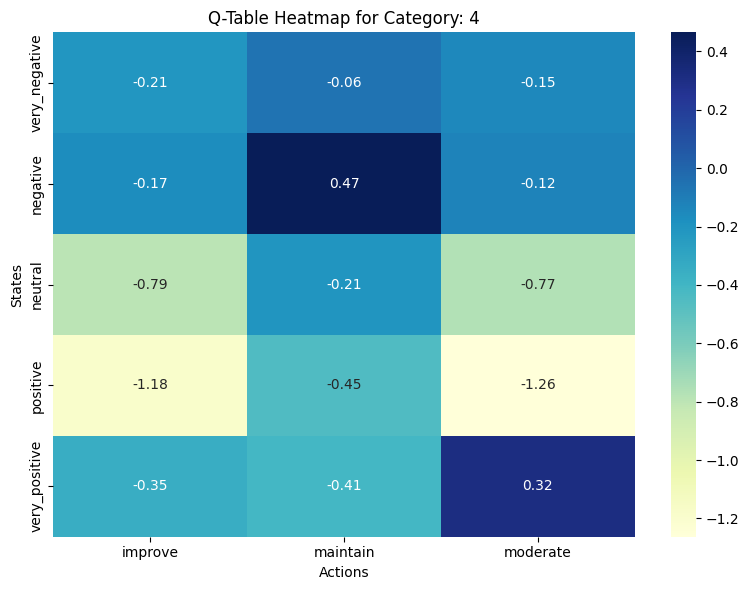

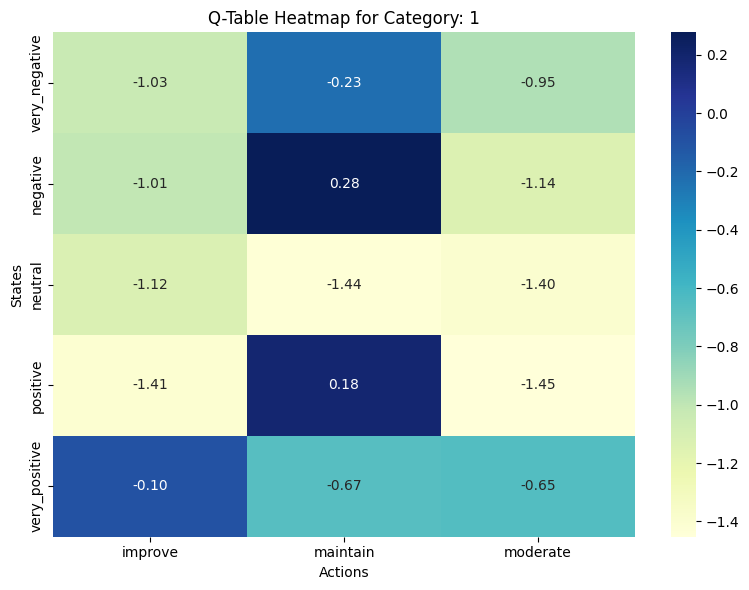

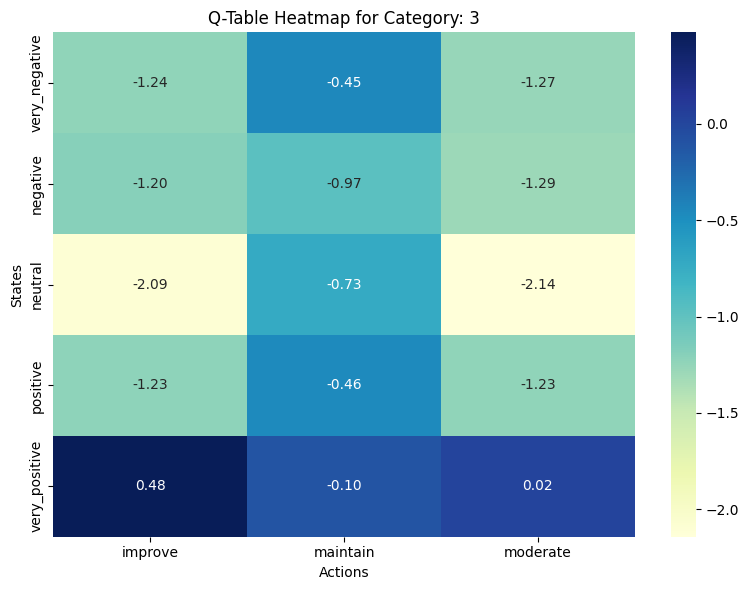

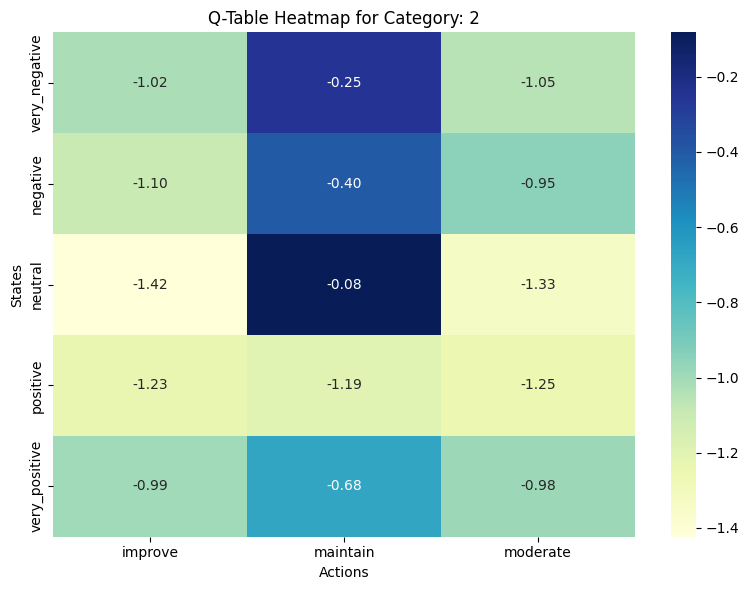

In [65]:
import seaborn as sns

for category in Rating_categories:
    plt.figure(figsize=(8, 6))
    sns.heatmap(q_tables[category], annot=True, fmt=".2f",
                xticklabels=actions, yticklabels=states, cmap="YlGnBu")
    plt.title(f"Q-Table Heatmap for Category: {category}")
    plt.xlabel("Actions")
    plt.ylabel("States")
    plt.tight_layout()
    plt.show()
